# For basic math operations

In [5]:
import numpy as np

# For plotting

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# For astronomy stuff

In [7]:
import astropy.io.fits as pyfits
from astropy.table import Table

# Read table from fits file

In [8]:
# Filename
filename = "./UNCOVER_DR1_LW_D070_catalog.fits"

# Open fits table to see its content
hdu = pyfits.open(filename)
print(hdu.info())

# Read data
data = Table.read(filename, hdu=1)

Filename: ./UNCOVER_DR1_LW_D070_catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    281   50365R x 96C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, K, K, K, K, D, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, D, D, D]   
None


# Plot red sequence

## Formula for apparent magnitude
If the flux is in units of $\rm erg~s^{−1}~cm^{−2}~Hz^{−1}$:
$m_{\rm AB} = -2.5 \log_{10} \left( f_\nu \right) - 48.60$

If the flux is in units of nano-jansky:
$m_{\rm AB} = -2.5 \log_{10} \left( f_\nu \right) + 8.90$

/var/folders/3g/01j4v12d63gbh8_wsh3wmxrr0000gn/T/ipykernel_86115/337852590.py:2: RuntimeWarning: invalid value encountered in log10
  abmag = -2.5 * np.log10(flux_njy * 1e-9) + 8.90


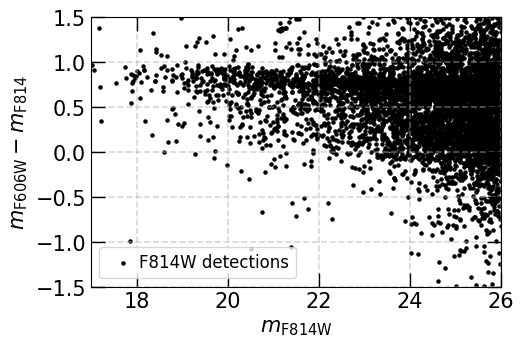

In [9]:
def njy_to_abmag(flux_njy):
   abmag = -2.5 * np.log10(flux_njy * 1e-9) + 8.90
   return abmag
   
# Convert fluxes to magnitudes
data["f_f606w"] = njy_to_abmag(10*data["f_f606w"])
data["f_f814w"] = njy_to_abmag(10*data["f_f814w"])

# Initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
fig.subplots_adjust(left=.15, bottom=.20, right=.97, top=.97, wspace=0.25, hspace=0.0)

ax.scatter(data["f_f814w"], data["f_f606w"] - data["f_f814w"], s=5, c="k", label="F814W detections")

# Set range of the plot
ax.set_xlim(17, 26)
ax.set_ylim(-1.5, 1.5)

# Set axis labels
ax.set_xlabel(r"$m_{\rm F814W}$", fontsize=15)
ax.set_ylabel(r"$m_{\rm F606W} - m_{\rm F814}$", fontsize=15)

# Set axis ticks
ax.tick_params(axis='both',length=10,width=1,which='major',direction="in", right=True,top=True,labelsize=15)
ax.tick_params(axis='both',length=6, width=1,which='minor',direction="in", right=True,top=True,labelsize=15)

# Set grid and legend
ax.grid(ls="--", lw=1.2, alpha=0.5)
ax.legend(fontsize=12, handletextpad=0, loc="lower left")

plt.show()

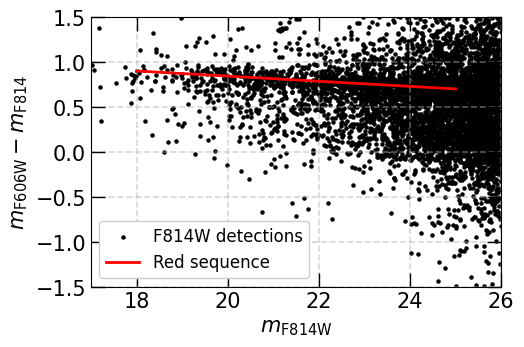

In [10]:
# Initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
fig.subplots_adjust(left=.15, bottom=.20, right=.97, top=.97, wspace=0.25, hspace=0.0)

ax.scatter(data["f_f814w"], data["f_f606w"] - data["f_f814w"], s=5, c="k", label="F814W detections")

ax.plot([18, 25], [0.9, 0.7], c="r", lw=2, label="Red sequence")

# Set range of the plot
ax.set_xlim(17, 26)
ax.set_ylim(-1.5, 1.5)

# Set axis labels
ax.set_xlabel(r"$m_{\rm F814W}$", fontsize=15)
ax.set_ylabel(r"$m_{\rm F606W} - m_{\rm F814}$", fontsize=15)

# Set axis ticks
ax.tick_params(axis='both',length=10,width=1,which='major',direction="in", right=True,top=True,labelsize=15)
ax.tick_params(axis='both',length=6, width=1,which='minor',direction="in", right=True,top=True,labelsize=15)

# Set grid and legend
ax.grid(ls="--", lw=1.2, alpha=0.5)
ax.legend(fontsize=12, loc="lower left", framealpha=1.0)

plt.show()

# Let us try to measure flux of one of the object
### <span style="color: red;">This serves merely as an illustration. There are many things that we are missing here (like errors, point spread function). You will learn more about these if you come in astro.</span>